In [2]:
import pandas as pd
import numpy as np
import statistics

In [3]:
df = pd.read_csv("/content/sample_data/Linear_Regression_Food_Truck.csv",names=["xlabel","ylabel"])
df

,xlabel,ylabel
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


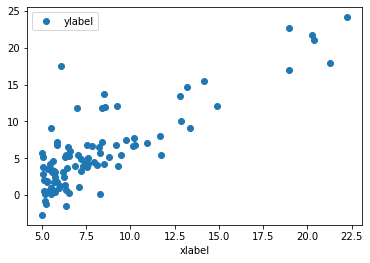

In [4]:
import matplotlib.pyplot as plt
# plot it
df.plot(x="xlabel",y="ylabel",style="o")
plt.show()

In [6]:
# now we need to have xmean and ymean
x_mean = df["xlabel"].mean()
y_mean = df["ylabel"].mean()
print(x_mean,y_mean)

8.159799999999999 5.839135051546393


In [7]:
#  we will have more colums 
df["x"] = df["xlabel"] - x_mean
df["y"] = df["ylabel"] - y_mean
df["x*y"] = df["x"]*df["y"]
df["x^2"] = df["x"]**2
df["y^2"] = df["y"]**2

In [8]:
df

,xlabel,ylabel,x,y,x*y,x^2,y^2
0,6.1101,17.59200,-2.0497,11.752865,-24.089847,4.201270,138.129834
1,5.5277,9.13020,-2.6321,3.291065,-8.662412,6.927950,10.831108
2,8.5186,13.66200,0.3588,7.822865,2.806844,0.128737,61.197216
3,7.0032,11.85400,-1.1566,6.014865,-6.956793,1.337724,36.178600
4,5.8598,6.82330,-2.3000,0.984165,-2.263579,5.290000,0.968581
...,...,...,...,...,...,...,...
92,5.8707,7.20290,-2.2891,1.363765,-3.121794,5.239979,1.859855
93,5.3054,1.98690,-2.8544,-3.852235,10.995820,8.147599,14.839715
94,8.2934,0.14454,0.1336,-5.694595,-0.760798,0.017849,32.428413
95,13.3940,9.05510,5.2342,3.215965,16.833004,27.396850,10.342431


In [9]:
# we need to have summationxy and summationxx and summationyy
sumaation_xy = df["x*y"].sum()
summation_xx = df["x^2"].sum()
summation_yy = df["y^2"].sum()

In [10]:
# correlation
correlation = sumaation_xy/(summation_xx*summation_xx)**0.5

In [11]:
# we need to have st_dev of x and y
st_dev_x = statistics.stdev(df["xlabel"])
st_dev_y = statistics.stdev(df["ylabel"])

In [14]:
# we meed to find the slope
m = correlation * (st_dev_y/st_dev_x)
m

1.6987405981173365

In [16]:
c = y_mean - m*x_mean
c

-8.022248480971447

In [18]:
df["y_pred"] = m*df["xlabel"] + c
df

,xlabel,ylabel,x,y,x*y,x^2,y^2,y_pred
0,6.1101,17.59200,-2.0497,11.752865,-24.089847,4.201270,138.129834,2.357226
1,5.5277,9.13020,-2.6321,3.291065,-8.662412,6.927950,10.831108,1.367880
2,8.5186,13.66200,0.3588,7.822865,2.806844,0.128737,61.197216,6.448643
3,7.0032,11.85400,-1.1566,6.014865,-6.956793,1.337724,36.178600,3.874372
4,5.8598,6.82330,-2.3000,0.984165,-2.263579,5.290000,0.968581,1.932032
...,...,...,...,...,...,...,...,...
92,5.8707,7.20290,-2.2891,1.363765,-3.121794,5.239979,1.859855,1.950548
93,5.3054,1.98690,-2.8544,-3.852235,10.995820,8.147599,14.839715,0.990250
94,8.2934,0.14454,0.1336,-5.694595,-0.760798,0.017849,32.428413,6.066087
95,13.3940,9.05510,5.2342,3.215965,16.833004,27.396850,10.342431,14.730683


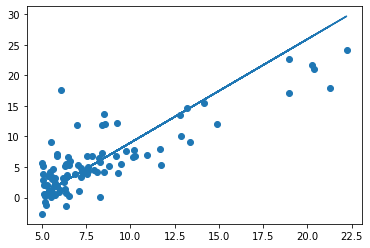

In [19]:
plot1 = plt.scatter(df["xlabel"],df["ylabel"])
plot2 = plt.plot(df["xlabel"],df["y_pred"])
plt.show()

In [20]:
correlation

1.193033644189594

In [21]:
ssr = ((df["y_pred"]-y_mean)**2).sum()

In [22]:
sse = ((df["ylabel"]-df["y_pred"])**2).sum()

In [23]:
sst = sse + ssr

In [24]:
r_sq = correlation**2

In [25]:
cost = sse/97